In [1]:
# Import necessary libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import KFold
#from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer


In [2]:
movies = pd.read_csv("Training sheet.csv")

In [3]:
movies_df = pd.DataFrame(movies)
movies_df.head()

,id,name,display_name,production_year,movie_sequel,creative_type,source,production_method,genre,language,board_rating_reason,movie_board_rating_display_name,movie_release_pattern_display_name,total,Category
0,7950115,Avatar,Avatar,2009,0,Science Fiction,Original Screenplay,Animation/Live Action,Action,English,"For intense epic battle sequences and warfare,...",PG-13,Wide,2784,9
1,50950115,Harry Potter and the Deathly Hallows: Part II,Harry Potter and the Deathly Hallows: Part II,2011,1,Fantasy,Based on Fiction Book/Short Story,Animation/Live Action,Adventure,English,for some sequences of intense action violence ...,PG-13,Wide,1328,9
2,119870115,Transformers 3,Transformers: Dark of the Moon,2011,1,Science Fiction,Based on TV,Animation/Live Action,Action,English,for intense prolonged sequences of sci-fi acti...,PG-13,Wide,1124,9
3,119590115,Toy Story 3,Toy Story 3,2010,1,Kids Fiction,Original Screenplay,Digital Animation,Adventure,English,General,G,Wide,1064,9
4,91700115,Pirates of the Caribbean 4,Pirates of the Caribbean: On Stranger Tides,2011,1,Fantasy,Based on Theme Park Ride,Live Action,Adventure,English,for intense sequences of action/adventure viol...,PG-13,Wide,1044,9


In [4]:
movies_df.columns

Index(['id', 'name', 'display_name', 'production_year', 'movie_sequel',
       'creative_type', 'source', 'production_method', 'genre', 'language',
       'board_rating_reason', 'movie_board_rating_display_name',
       'movie_release_pattern_display_name', 'total', 'Category'],
      dtype='object')

In [7]:
df = movies_df[pd.notnull(movies_df['board_rating_reason'])]    #derived from https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Consumer_complaints.ipynb

In [8]:
df.info() #Input as board_rating_reason and output as movie_board_rating_display_name

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1196 entries, 0 to 1195
Data columns (total 15 columns):
id                                    1196 non-null int64
name                                  1196 non-null object
display_name                          1196 non-null object
production_year                       1196 non-null int64
movie_sequel                          1196 non-null int64
creative_type                         1196 non-null object
source                                1196 non-null object
production_method                     1196 non-null object
genre                                 1196 non-null object
language                              1196 non-null object
board_rating_reason                   1196 non-null object
movie_board_rating_display_name       1196 non-null object
movie_release_pattern_display_name    1196 non-null object
total                                 1196 non-null int64
Category                              1196 non-null int64
dtypes: int64

In [9]:
col = ['board_rating_reason', 'movie_board_rating_display_name']
df = df[col]

In [10]:
df['id'] = df['movie_board_rating_display_name'].factorize()[0]
from io import StringIO
category_id_df = df[['movie_board_rating_display_name', 'id']].drop_duplicates().sort_values('id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['id', 'movie_board_rating_display_name']].values)

In [11]:
df.head()

,board_rating_reason,movie_board_rating_display_name,id
0,"For intense epic battle sequences and warfare,...",PG-13,0
1,for some sequences of intense action violence ...,PG-13,0
2,for intense prolonged sequences of sci-fi acti...,PG-13,0
3,General,G,1
4,for intense sequences of action/adventure viol...,PG-13,0


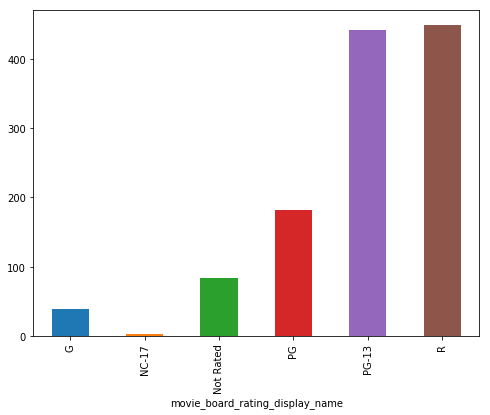

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('movie_board_rating_display_name').board_rating_reason.count().plot.bar(ylim=0)
plt.show() #shows differences in dataset with respect to children vs adult movies

In [13]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.board_rating_reason).toarray()
labels = df.id
features.shape

(1196, 271)

In [14]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for movie_board_rating_display_name, id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(movie_board_rating_display_name))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))


# 'G':
  . Most correlated unigrams:
       . rated
       . general
  . Most correlated bigrams:
       . international excluded
       . sexual content
# 'NC-17':
  . Most correlated unigrams:
       . sexuality
       . scene
  . Most correlated bigrams:
       . international excluded
       . sexual content
# 'Not Rated':
  . Most correlated unigrams:
       . international
       . excluded
  . Most correlated bigrams:
       . sexual content
       . international excluded
# 'PG':
  . Most correlated unigrams:
       . rude
       . mild
  . Most correlated bigrams:
       . mild language
       . rude humor
# 'PG-13':
  . Most correlated unigrams:
       . sequences
       . intense
  . Most correlated bigrams:
       . international excluded
       . intense sequences
# 'R':
  . Most correlated unigrams:
       . bloody
       . pervasive
  . Most correlated bigrams:
       . international excluded
       . pervasive language


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['board_rating_reason'], df['movie_board_rating_display_name'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\Users\dinot\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\dinot\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\dinot\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\dinot\AppData\Local\conda\conda\envs\pythondata\lib\site-pack

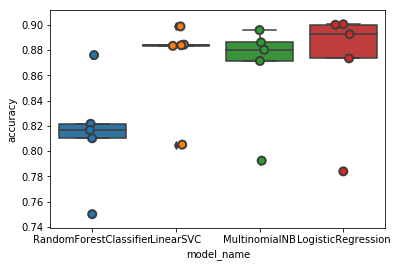

In [18]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()
#Linear SVC is a clear winner with lowest variance in accuracy

In [19]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.871053
LogisticRegression        0.870059
MultinomialNB             0.865163
RandomForestClassifier    0.814881
Name: accuracy, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

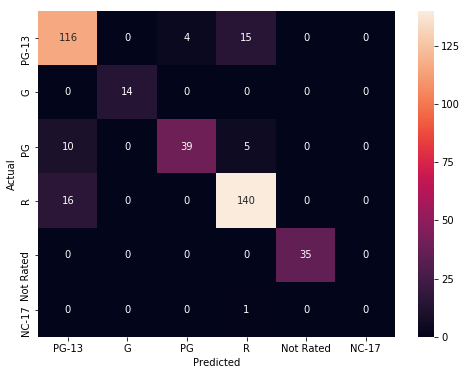

In [22]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.movie_board_rating_display_name.values, yticklabels=category_id_df.movie_board_rating_display_name.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [23]:
model.fit(features, labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [24]:
from sklearn.feature_selection import chi2

N = 2
for movie_board_rating_display_name, id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(movie_board_rating_display_name))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'G':
  . Top unigrams:
       . general
       . rated
  . Top bigrams:
       . content pervasive
       . content violence
# 'NC-17':
  . Top unigrams:
       . scene
       . sexuality
  . Top bigrams:
       . sexual content
       . international excluded
# 'Not Rated':
  . Top unigrams:
       . excluded
       . international
  . Top bigrams:
       . international excluded
       . content nudity
# 'PG':
  . Top unigrams:
       . mild
       . action
  . Top bigrams:
       . humor language
       . brief smoking
# 'PG-13':
  . Top unigrams:
       . sequences
       . reference
  . Top bigrams:
       . strong language
       . drug references
# 'R':
  . Top unigrams:
       . pervasive
       . strong
  . Top bigrams:
       . strong violence
       . language violent


In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['movie_board_rating_display_name'].unique()))

             precision    recall  f1-score   support

      PG-13       0.82      0.86      0.84       135
          G       1.00      1.00      1.00        14
         PG       0.91      0.72      0.80        54
          R       0.87      0.90      0.88       156
  Not Rated       1.00      1.00      1.00        35
      NC-17       0.00      0.00      0.00         1

avg / total       0.87      0.87      0.87       395



C:\Users\dinot\AppData\Local\conda\conda\envs\pythondata\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
